<h3>Практическое задание №5. Преобразования СВ для потерь,
SNR и скорости Шеннона</h3>

В данном случае, случайная величина - расстояние. Тогда функция потерь, зависящая только от расстояния, будет так же случайной величиной. Т.к. мы знаем плотность для расстояния, то требуется найти плотность для fspl, зависящей от x.

Определим $fspl(x)$ как:

$fspl(x) = C + 20 \cdot log_{10}(x)$

Тогда выразим х:

$\frac{fspl(x) - C}{20} = log_{10}(x)$

$x = 10^{\frac{fspl(x)-C}{20}}$

Далее нужно найти модуль производной по $fspl(x)$:

$x' = \frac{1}{20} \cdot ln(10) \cdot 10^{\frac{fspl(x)-C}{20}}$

Тогда умножая это на плотность равномерного распределения в заданных пределах от 1 до 100 метров:

$P(fspl(x)) = \frac{1}{20 \cdot 99} \cdot ln(10) \cdot 10^{\frac{fspl(x)-C}{20}}$

In [47]:
import math;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy as sc;

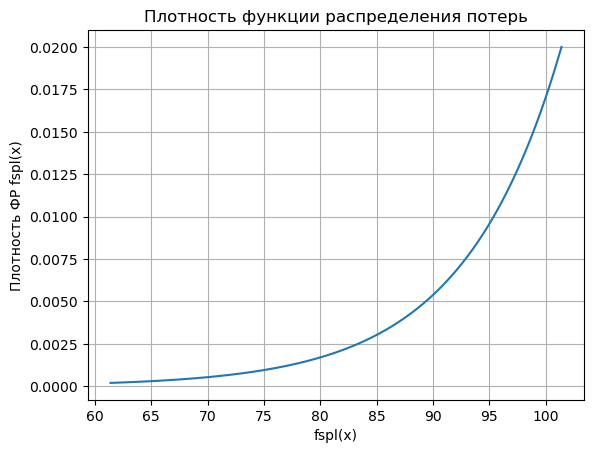

In [48]:
SPEED_OF_LIGHT = 299_792_458;
FREQUENCY = 28e9;

#Та самая константа C
PREPARED_CONST = 20 * math.log10(4 * math.pi / SPEED_OF_LIGHT * FREQUENCY);

x = np.linspace(1, 100, 1000);
fspl = lambda x: PREPARED_CONST + 20 * math.log10(x);
xfspl = [fspl(i) for i in x];
pfspl = lambda x: 1 / (20 * 99) * math.log(10) * 10 ** ((fspl(x) - PREPARED_CONST) / 20);

(norm, add) = sc.integrate.quad(pfspl, 1, 100);
xpfspl = [pfspl(i) / norm for i in x];

plt.plot(xfspl, xpfspl);
plt.grid();
plt.xlabel("fspl(x)");
plt.ylabel("Плотность ФР fspl(x)");
plt.title("Плотность функции распределения потерь");
plt.show();

Скопипастим и модифицируем функции так, чтобы функция распределения относилась к входящему сигналу:

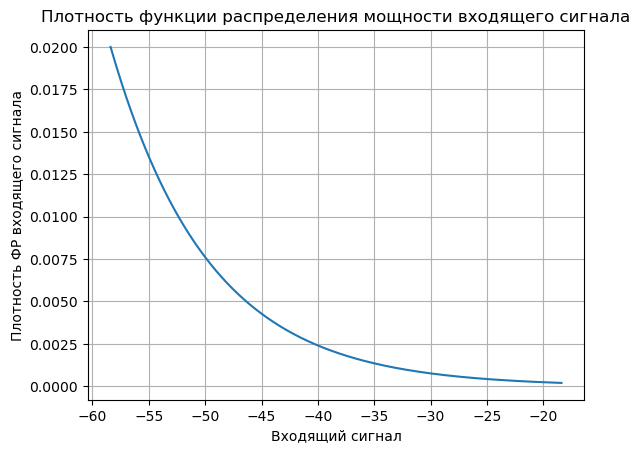

In [56]:
income = lambda x: 43 - fspl(x);
pincome = lambda x: 1 / (20 * 99) * math.log(10) * 10 ** ((- 43 + fspl(x) - PREPARED_CONST) / 20);

(norm2, add2) = sc.integrate.quad(pincome, 1, 100);

xincome = [income(i) for i in x];
xpincome = [pincome(i)/norm2 for i in x];

plt.plot(xincome, xpincome);
plt.grid();
plt.xlabel("Входящий сигнал");
plt.ylabel("Плотность ФР входящего сигнала");
plt.title("Плотность функции распределения мощности входящего сигнала");
plt.show();

Так как мощности учитывались в логарифмической шкале, то найти плотность распределения шума проблем не составит:

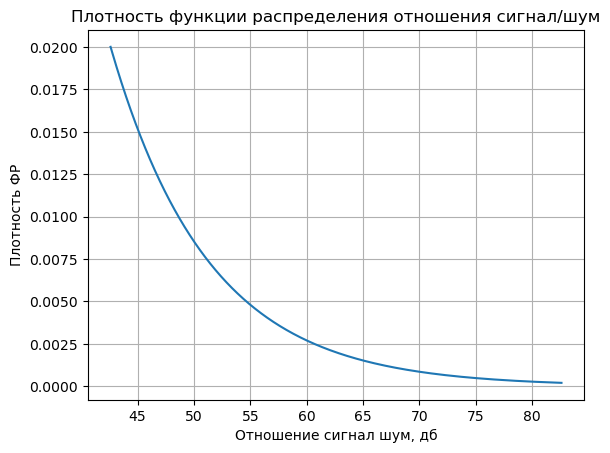

In [58]:
B = 20e+6;
N = -174;
Pn = 10 * math.log10(B) + N;

snr = lambda x: 43 - fspl(x) - Pn;
psnr = lambda x: 1 / (20 * 99) * math.log(10) * 10 ** (( - 43 + fspl(x) - PREPARED_CONST + Pn) / 20);

(norm3, add3) = sc.integrate.quad(psnr, 1, 100);

xsnr = [snr(i) for i in x];
xpsnr = [psnr(i)/norm3 for i in x];

plt.plot(xsnr, xpsnr);
plt.grid();
plt.xlabel("Отношение сигнал шум, дб");
plt.ylabel("Плотность ФР");
plt.title("Плотность функции распределения отношения сигнал/шум");
plt.show();

С максимальной теоретической пропускной способностью будет чуть сложнее. Т.к. мы знаем плотность распределения для отношения сигнал шум, дальше действовать будем исходя из SNR функции:

$speed(snr) = B \cdot log_2(1 + 10^{snr / 10})$

$2^{\frac{speed(snr)}{B}} = 1 + 10^{snr / 10}$

$10 \cdot log_{10}(2^{\frac{speed(snr)}{B}} - 1) = snr$

Модуль производной:

$snr' = \frac{10 ln(2)}{B}\cdot \frac{2^{\frac{speed(snr)}{B}}}{(2^{\frac{speed(snr)}{B}} - 1) \cdot ln(10)}$

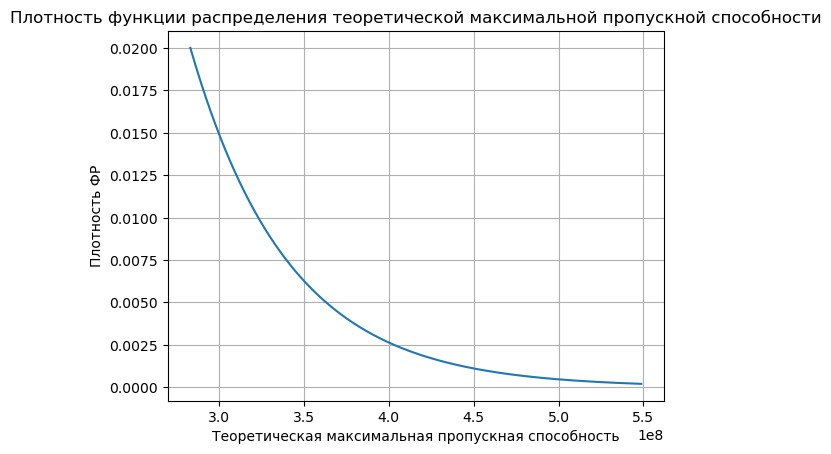

In [59]:
speed = lambda x : B * math.log2(1 + 10** (snr(x) / 10));
exp = lambda x : 2 ** (speed(x) / B);
pspeed = lambda x : psnr(x) * abs( 10 * math.log(2) / B * exp(x) / (exp(x) - 1) / math.log(10));

(norm4, add4) = sc.integrate.quad(pspeed, 1, 100);

xspeed = [speed(i) for i in x];
xpspeed = [pspeed(i)/norm4 for i in x];

plt.plot(xspeed, xpspeed);
plt.grid();
plt.xlabel("Теоретическая максимальная пропускная способность");
plt.ylabel("Плотность ФР");
plt.title("Плотность функции распределения теоретической максимальной пропускной способности");
plt.show();